In [1]:
!pip install flask flask-cors requests opencv-python-headless python-dotenv matplotlib


In [ ]:
import os
import requests
import cv2
import numpy as np
import json
from dotenv import load_dotenv
from matplotlib import pyplot as plt

# Load API key from .env (create one in your notebook folder if you haven’t)
load_dotenv()
API_KEY = "jo3N7VAQxr1AQoMYJISq"

# Roboflow model info
MODEL_ID = "tooth-detection-t8kyk"   # 👈 replace with your actual model ID from Roboflow
MODEL_VERSION = "2"


In [3]:
def detect_teeth(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Invalid image path or unreadable image.")

    # Prepare API request
    url = f"https://detect.roboflow.com/{MODEL_ID}/{MODEL_VERSION}"
    params = {"api_key": API_KEY, "confidence": 40, "overlap": 30}

    # Convert to bytes
    _, encoded_image = cv2.imencode(".jpg", image)
    response = requests.post(url, files={"file": encoded_image.tobytes()}, params=params)

    result = response.json()
    predictions = result.get("predictions", [])

    print(f"🦷 Detected {len(predictions)} teeth regions")

    # Draw boxes
    for p in predictions:
        x, y, w, h = int(p["x"]), int(p["y"]), int(p["width"]), int(p["height"])
        x1, y1 = x - w//2, y - h//2
        x2, y2 = x + w//2, y + h//2

        # Draw light blue rectangle
        color = (173, 216, 230)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, "Teeth", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image, len(predictions)


In [6]:
image_path = "Untitled.jpg"  # 👈 change this to your image file path
output_image, num_teeth = detect_teeth(image_path)


🦷 Detected 1 teeth regions


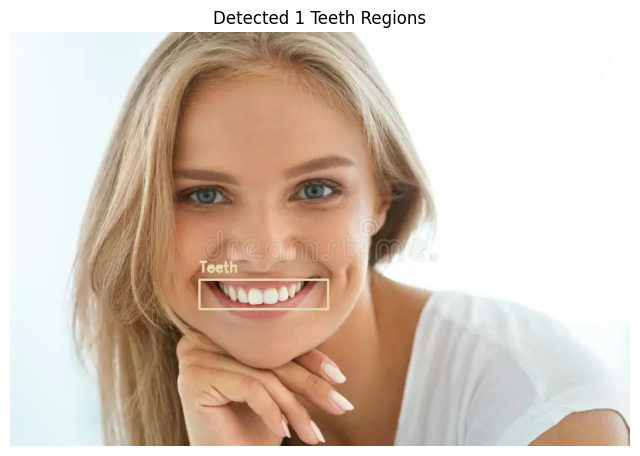

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Detected {num_teeth} Teeth Regions")
plt.show()
